# House Prices - Regression Predictions YData 2024    

**Team: Random Forest Rangers** ([Dmitry Gufranov](https://www.linkedin.com/in/gufranov/), [Evgenia Amineva](https://www.linkedin.com/in/janeami/), [Valeriya Vazhnova](https://www.linkedin.com/in/gufranov/))

### Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import datetime

# vizualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# ml
from lightgbm import LGBMRegressor
import catboost as cb
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

c:\Users\dmitr\miniconda3\envs\y_data\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dmitr\AppData\Local\Temp\ipykernel_14580\3150300134.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

### Loading the data

In [3]:
# load the train data
df = pd.read_csv('train.csv')
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preprocessing

In [ ]:
# these lists were created in Feat_eng_expl file

cat_cols_oe = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

cat_cols_oh = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', \
               'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', \
                'SaleCondition', 'MSSubClass', 'OverallCond', 'KitchenAbvGr', 'MoSold', 'YrSold']

cat_cols_tdrop = ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'PoolQC', 'MiscFeature', 'MiscVal']

num_cols_norm = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', \
                 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

num_cols_asis = ['OverallQual', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

num_cols_tdrop = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

num_cols_flag = ['BsmtFinSF2', 'LowQualFinSF', '3SsnPorch', 'PoolArea']

In [15]:
# Changing

cat_cols_oe = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

cat_cols_oh = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', \
               'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', \
                'SaleCondition', 'MSSubClass', 'KitchenAbvGr', 'MoSold', 'YrSold']

cat_cols_tdrop = ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'PoolQC', 'MiscFeature', 'MiscVal', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF']

num_cols_norm = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', \
                  'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

num_cols_asis = ['OverallQual', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

num_cols_tdrop = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

num_cols_flag = ['BsmtFinSF2', 'LowQualFinSF', '3SsnPorch', 'PoolArea']

In [27]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


def fill_miss(df):

    df_upd = df.copy()

    # fill columns wheare missing values have a meaning NA
    feat_wn = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual']
    
    for c in df_upd.columns:
        if c in feat_wn:
            df_upd[c].fillna('NA', inplace=True)

    # fill with mean missing num features
    num_si = SimpleImputer(strategy='mean')
    num_col= df_upd.dtypes[df_upd.dtypes != 'object']
    df_upd[num_col.index] = num_si.fit_transform(df_upd[num_col.index])

    # fill with most frequent categorical features
    cat_si = SimpleImputer(strategy='most_frequent')
    cat_col= df_upd.dtypes[df_upd.dtypes == 'object']
    df_upd[cat_col.index] = cat_si.fit_transform(df_upd[cat_col.index])


    return df_upd

def feat_eng(df, num_cols_tdrop, num_cols_norm, num_cols_flag):
    df_upd = df.copy()


    # create new feature for bathrooms
    # corr coef
    #     0.22512486719612368
    # -0.012188876310787316
    # 0.6359570562496957
    # 0.34300754918568294

    df_upd['Bath'] = 0.225 * df['BsmtFullBath'] + (-0.0121) * df['BsmtHalfBath'] + 0.636 * df['FullBath'] + 0.343 * df['HalfBath']
    
    # drop columns
    df_upd = df_upd.drop(num_cols_tdrop, axis=1)

    # # normalizing
    # power = PowerTransformer(method='yeo-johnson', standardize=True)
    # df_upd[num_cols_norm] = power.fit_transform(df_upd[num_cols_norm])

    for c in num_cols_flag:
        if c in df_upd.columns:
            df_upd[c] = df_upd[c].apply(lambda x: 1 if x>0 else 0)


    return df_upd

def transf_cat(df, cat_cols_oh, cat_cols_oe, cat_cols_tdrop):
    df_upd = df.copy()

    # merge values in LotConfig
    if 'LotConfig' in  df_upd.columns:
        df_upd.loc[df_upd['LotConfig']=='FR3', 'LotConfig'] = 'FR2'


    #
    if 'LandSlope' in  df_upd.columns:
        df_upd.loc[df_upd['LandSlope']=='Sev', 'LandSlope'] = 'Mod'
        df_upd['GtlSlope'] = df_upd['LandSlope'].apply(lambda x: 1 if x=='Gtl' else 0)
        df_upd[['LandSlope', 'GtlSlope']][:5]

    # merge values in Conditional1
    for cc in [['RRNn', 'RRAn'], ['RRNe', 'RRAe'], ['PosN', 'PosA']]:
        df_upd.loc[df_upd['Condition1']==cc[0], 'Condition1'] = cc[1]


    # transform 
    oec = OrdinalEncoder(categories = [['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]) 
    # for cc in ['FireplaceQu', 'KitchenQual', 'HeatingQC', 'PoolQC', 'BsmtQual', 'ExterQual', 'ExterCond']:
    for cc in cat_cols_oe:
        if cc in df_upd.columns:
            df_upd[cc] = oec.fit_transform(df_upd[[cc]])

    df_upd['CompositeQuality'] = df_upd['OverallQual'] + df_upd['ExterQual'] + df_upd['BsmtQual'] + 0.5 * df_upd['HeatingQC'] +  df_upd['KitchenQual'] + 0.5 * df_upd['FireplaceQu']
    
    class GetDummiesTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, *args, pandas_params={}, **kwargs):
            super().__init__(*args, **kwargs)
            self._pandas_params = pandas_params
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            return pd.get_dummies(X, dtype = 'int', **self._pandas_params)
    
    df_upd = GetDummiesTransformer(pandas_params={'columns':cat_cols_oh}).transform(df_upd)

    df_upd = df_upd.drop(cat_cols_tdrop, axis=1)

    return df_upd

### Model construction

In [17]:
rst = 44

In [28]:
tdf = df.copy()
tdf = fill_miss(tdf)

# normalization
power = PowerTransformer(method='yeo-johnson', standardize=True)
power.fit(tdf[num_cols_norm])

tdf[num_cols_norm] = power.transform(tdf[num_cols_norm])
tdf = feat_eng(tdf, num_cols_tdrop, num_cols_norm, num_cols_flag)
tdf = transf_cat(tdf, cat_cols_oh, cat_cols_oe, cat_cols_tdrop)
label = np.log1p(tdf['SalePrice'])
tdf.drop(['Id', 'SalePrice'], axis=1, inplace=True)

#### Define the most important features

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(df_fm, np.log1p(label), test_size=0.25, random_state=r_st)

# Create an instance of the LightGBM Regressor with the RMSE metric.
model_lgb = LGBMRegressor()
 
# Train the model using the training data.
model_lgb.fit(tdf, label)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2488
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 192
[LightGBM] [Info] Start training from score 12.024057


LGBMRegressor()

In [30]:
# Sort feature importances from GBC model trained earlier
ifeatures_ind = np.argsort(model_lgb.feature_importances_)[::-1]
ifeatures = tdf.columns[ifeatures_ind[:75]]

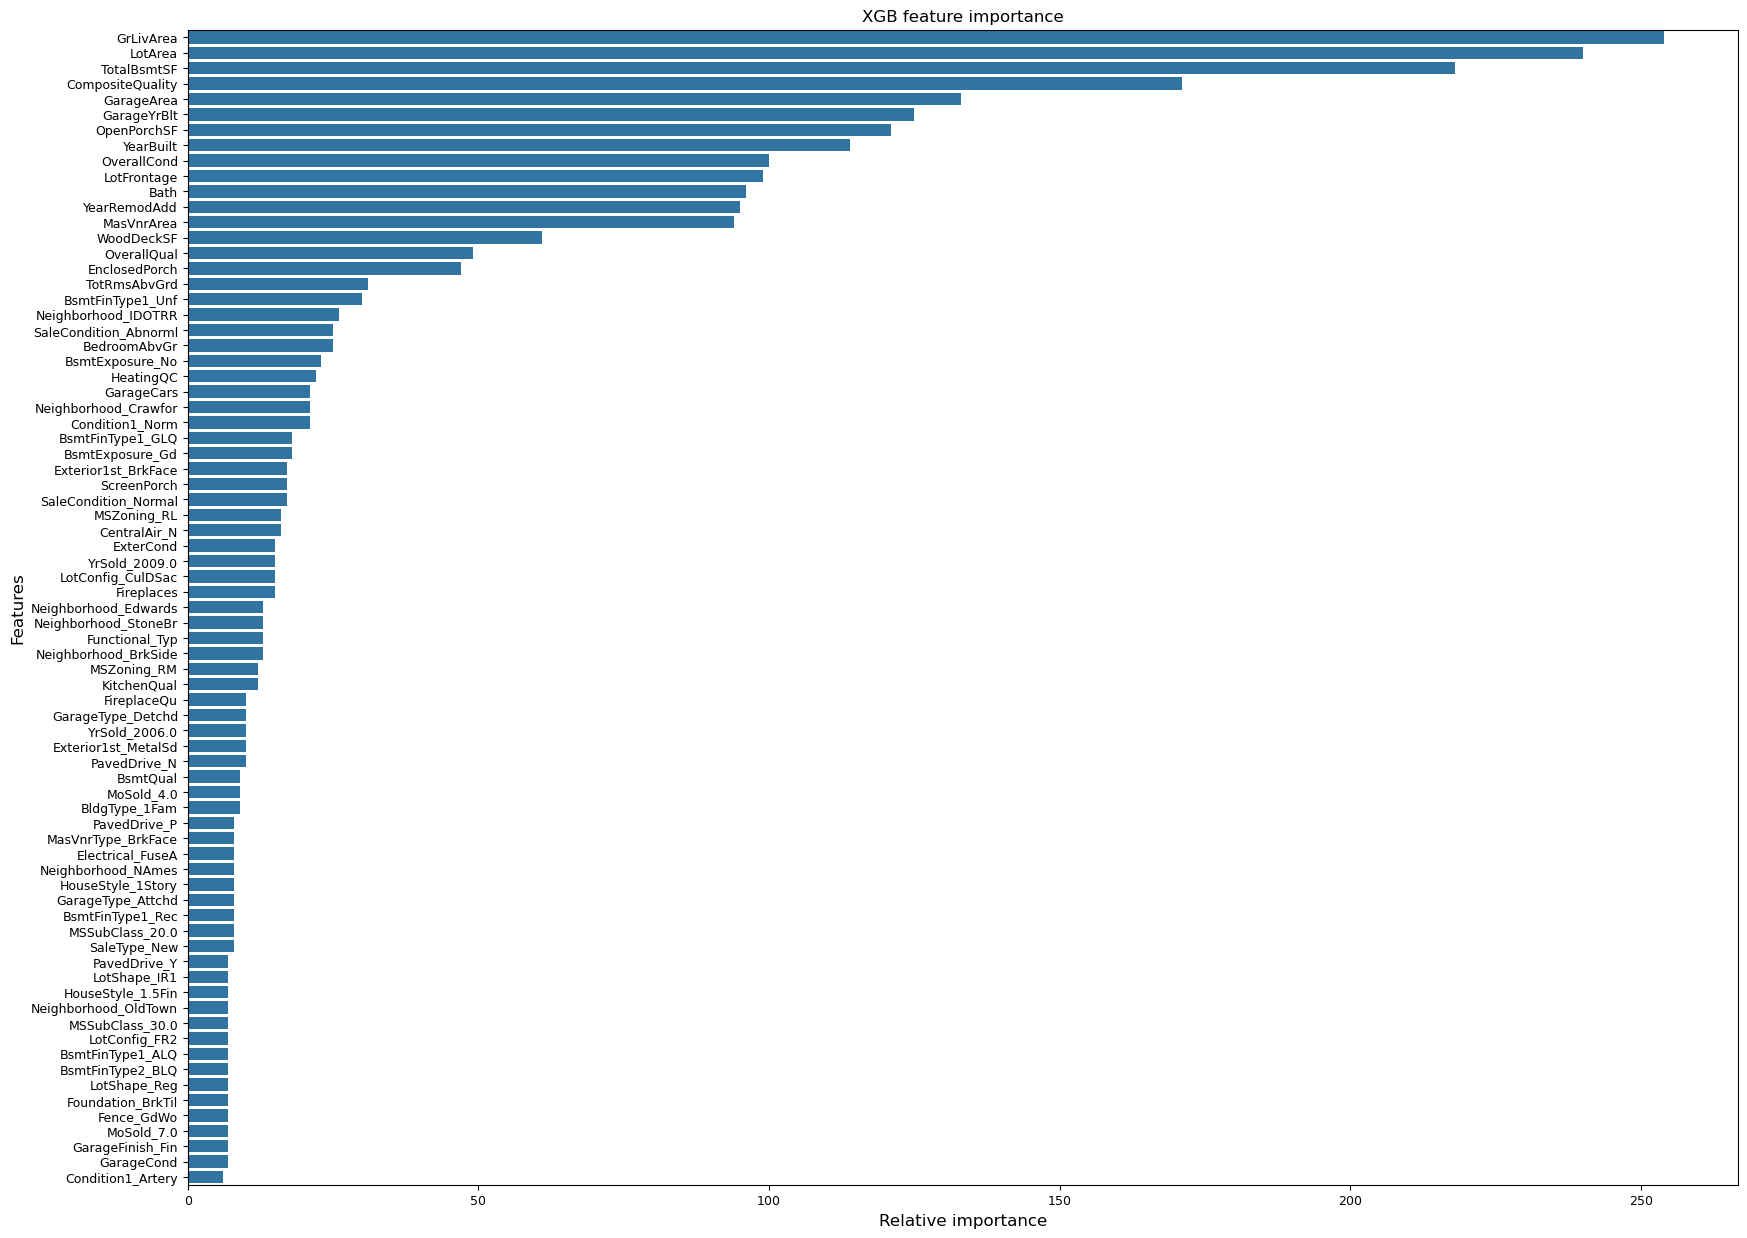

In [31]:
# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=tdf.columns[ifeatures_ind[:75]], x = model_lgb.feature_importances_[ifeatures_ind[:75]], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

#### Models

In [32]:
# prepare train / validation
tdf = df.copy()
tdf = fill_miss(tdf)
# normalizing
power = PowerTransformer(method='yeo-johnson', standardize=True)
power.fit(tdf[num_cols_norm])
tdf[num_cols_norm] = power.transform(tdf[num_cols_norm])
tdf = feat_eng(tdf, num_cols_tdrop, num_cols_norm, num_cols_flag)
tdf = transf_cat(tdf, cat_cols_oh, cat_cols_oe, cat_cols_tdrop)
label = np.log1p(tdf['SalePrice'])
tdf.drop(['Id', 'SalePrice'], axis=1, inplace=True)

tdf = tdf[ifeatures]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(tdf, label, test_size=0.25, random_state=rst)

In [14]:

#Machine Learning Algorithm (MLA) Selection and Initialization
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), SVR(), RandomForestRegressor(), cb.CatBoostRegressor(verbose=False), LGBMRegressor(verbose=-1)]

for model in models:
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    print('Testing performance', model.__class__.__name__)
    print('RMSE: {:.2f}'.format(rmse))
    print('R2: {:.2f}'.format(r2), '\n')


Testing performance KernelRidge
RMSE: 0.49
R2: -0.47 

Testing performance ElasticNet
RMSE: 0.40
R2: 0.02 

Testing performance Lasso
RMSE: 0.40
R2: 0.02 

Testing performance GradientBoostingRegressor
RMSE: 0.14
R2: 0.89 

Testing performance BayesianRidge
RMSE: 0.12
R2: 0.91 

Testing performance SVR
RMSE: 0.20
R2: 0.77 

Testing performance RandomForestRegressor
RMSE: 0.15
R2: 0.87 

Testing performance CatBoostRegressor
RMSE: 0.13
R2: 0.90 

Testing performance LGBMRegressor
RMSE: 0.14
R2: 0.87 



In [78]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), SVR(), RandomForestRegressor(), cb.CatBoostRegressor(verbose=False), LGBMRegressor(verbose=-1)]

KR_param_grid = {'alpha': [0.1], 'coef0': [1], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], #'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'precompute': [False], #'normalize': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'max_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
SVR_param_grid = {'C': [20], 'epsilon': [0.05], 'gamma': [0.0003]}
RFR_param_grid = {'n_estimators': [50], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]} #'max_features': ['auto'], 
CB_param_grid = {'iterations': [200],
        'learning_rate': [0.1],
        'depth': [4],
        'l2_leaf_reg': [0.5]}
LGB_param_grid = {
    'learning_rate': [0.05],
    "max_depth": [8 ],
    "num_leaves": [180], 
    "max_bin": [200],
    'n_estimators': [250]
}

params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, SVR_param_grid, RFR_param_grid, CB_param_grid, LGB_param_grid]
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, y_train)
    gs_best = gs_alg.best_estimator_
   

    pred = gs_alg.predict(X_test)

    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((y_test-gs_alg.predict(X_test))**2).mean())
    
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    print('Testing performance', alg.__class__.__name__)
    print(str(gs_alg.best_params_))
    print('RMSE: {:.2f}'.format(rmse))
    print('R2: {:.2f}'.format(r2), '\n')

# decimals = 3
# after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
# after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
# after_model_compare

Testing performance KernelRidge
{'alpha': 0.1, 'coef0': 1, 'degree': 1, 'gamma': None, 'kernel': 'polynomial'}
RMSE: 0.13
R2: 0.90 

Testing performance ElasticNet
{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.6, 'max_iter': 300, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.001}
RMSE: 0.12
R2: 0.91 

Testing performance Lasso
{'alpha': 0.0005, 'copy_X': True, 'fit_intercept': True, 'max_iter': 300, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.01}
RMSE: 0.12
R2: 0.91 

Testing performance GradientBoostingRegressor
{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 0.0025, 'n_estimators': 300}
RMSE: 0.13
R2: 0.90 

Testing performance BayesianRidge
{'alpha_1': 1e-08, 'alpha_2': 5e-06, 'copy_X': True, 'lambda_1': 5e-06, 'lambda_2': 1e-08, 'max_iter': 200, 'tol': 1e-05}
RMSE: 0.12
R2: 0.91 

Testing performance SVR
{'C': 20, 'epsilon': 0.05, 'gamma': 0.0003}


In [80]:
# outliers
rem_id = [30, 88, 462, 631, 1322]

# prepare train / validation
tdf = df.copy()
tdf = tdf[~tdf['Id'].isin(rem_id)]
tdf = fill_miss(tdf)
# normalizing
power = PowerTransformer(method='yeo-johnson', standardize=True)
power.fit(tdf[num_cols_norm])
tdf[num_cols_norm] = power.transform(tdf[num_cols_norm])
tdf = feat_eng(tdf, num_cols_tdrop, num_cols_norm, num_cols_flag)
tdf = transf_cat(tdf, cat_cols_oh, cat_cols_oe, cat_cols_tdrop)
label = np.log1p(tdf['SalePrice'])
tdf.drop(['Id', 'SalePrice'], axis=1, inplace=True)

tdf = tdf[ifeatures]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(tdf, label, test_size=0.25, random_state=rst)

In [82]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), SVR(), RandomForestRegressor(), cb.CatBoostRegressor(verbose=False), LGBMRegressor(verbose=-1)]

KR_param_grid = {'alpha': [0.1], 'coef0': [1], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], #'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'precompute': [False], #'normalize': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'max_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
SVR_param_grid = {'C': [20], 'epsilon': [0.05], 'gamma': [0.0003]}
RFR_param_grid = {'n_estimators': [50], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]} #'max_features': ['auto'], 
CB_param_grid = {'iterations': [200],
        'learning_rate': [0.1],
        'depth': [4],
        'l2_leaf_reg': [0.5]}
LGB_param_grid = {
    'learning_rate': [0.05],
    "max_depth": [8 ],
    "num_leaves": [180], 
    "max_bin": [200],
    'n_estimators': [250]
}

params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, SVR_param_grid, RFR_param_grid, CB_param_grid, LGB_param_grid]
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, y_train)
    gs_best = gs_alg.best_estimator_
   

    pred = gs_alg.predict(X_test)

    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((y_test-gs_alg.predict(X_test))**2).mean())
    
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    print('Testing performance', alg.__class__.__name__)
    print(str(gs_alg.best_params_))
    print('RMSE: {:.2f}'.format(rmse))
    print('R2: {:.2f}'.format(r2), '\n')

# decimals = 3
# after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
# after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
# after_model_compare

Testing performance KernelRidge
{'alpha': 0.1, 'coef0': 1, 'degree': 1, 'gamma': None, 'kernel': 'polynomial'}
RMSE: 0.13
R2: 0.87 

Testing performance ElasticNet
{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.6, 'max_iter': 300, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.001}
RMSE: 0.13
R2: 0.88 

Testing performance Lasso
{'alpha': 0.0005, 'copy_X': True, 'fit_intercept': True, 'max_iter': 300, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.01}
RMSE: 0.13
R2: 0.88 

Testing performance GradientBoostingRegressor
{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 0.0025, 'n_estimators': 300}
RMSE: 0.14
R2: 0.87 

Testing performance BayesianRidge
{'alpha_1': 1e-08, 'alpha_2': 5e-06, 'copy_X': True, 'lambda_1': 5e-06, 'lambda_2': 1e-08, 'max_iter': 200, 'tol': 1e-05}
RMSE: 0.13
R2: 0.88 

Testing performance SVR
{'C': 20, 'epsilon': 0.05, 'gamma': 0.0003}


#### Test data

In [ ]:
test_data = pd.read_csv('test.csv')

test_data = fill_miss(test_data)
# normalizing
test_data[num_cols_norm] = power.transform(test_data[num_cols_norm])
test_data = feat_eng(test_data, num_cols_tdrop, num_cols_norm, num_cols_flag)
test_data = transf_cat(test_data, cat_cols_oh, cat_cols_oe, cat_cols_tdrop)
t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

test_data = test_data[ifeatures]

In [ ]:
y_tpred_CBR = model.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = y_tpred_CBR
subm.set_index('Id').to_csv('submission_cbr2.csv')

## Adaboost

In [36]:
X_train, X_test, y_train, y_test = train_test_split(tdf, label, test_size=0.25, random_state=rst)

In [37]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [38]:
y_pred = regr.predict(X_test)

In [39]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, pred)
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.2f}'.format(r2), '\n')

RMSE: 0.1797
R2: 0.88 



In [34]:

#Machine Learning Algorithm (MLA) Selection and Initialization
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), SVR(), RandomForestRegressor(), cb.CatBoostRegressor(verbose=False), LGBMRegressor(verbose=-1)]

for model in models:
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    print('Testing performance', model.__class__.__name__)
    print('RMSE: {:.2f}'.format(rmse))
    print('R2: {:.2f}'.format(r2), '\n')

Testing performance KernelRidge
RMSE: 0.33
R2: 0.34 

Testing performance ElasticNet
RMSE: 0.26
R2: 0.57 

Testing performance Lasso
RMSE: 0.35
R2: 0.27 

Testing performance GradientBoostingRegressor
RMSE: 0.14
R2: 0.88 

Testing performance BayesianRidge
RMSE: 0.12
R2: 0.91 

Testing performance SVR
RMSE: 0.19
R2: 0.78 

Testing performance RandomForestRegressor
RMSE: 0.15
R2: 0.87 

Testing performance CatBoostRegressor
RMSE: 0.13
R2: 0.90 

Testing performance LGBMRegressor
RMSE: 0.14
R2: 0.88 



In [40]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), SVR(), RandomForestRegressor(), cb.CatBoostRegressor(verbose=False), LGBMRegressor(verbose=-1)]

KR_param_grid = {'alpha': [0.1], 'coef0': [1], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], #'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'precompute': [False], #'normalize': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'max_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
SVR_param_grid = {'C': [20], 'epsilon': [0.05], 'gamma': [0.0003]}
RFR_param_grid = {'n_estimators': [50], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]} #'max_features': ['auto'], 
CB_param_grid = {'iterations': [200],
        'learning_rate': [0.1],
        'depth': [4],
        'l2_leaf_reg': [0.5]}
LGB_param_grid = {
    'learning_rate': [0.05],
    "max_depth": [8 ],
    "num_leaves": [180], 
    "max_bin": [200],
    'n_estimators': [250]
}

params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, SVR_param_grid, RFR_param_grid, CB_param_grid, LGB_param_grid]
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, y_train)
    gs_best = gs_alg.best_estimator_
   

    pred = gs_alg.predict(X_test)

    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((y_test-gs_alg.predict(X_test))**2).mean())
    
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    print('Testing performance', alg.__class__.__name__)
    print(str(gs_alg.best_params_))
    print('RMSE: {:.2f}'.format(rmse))
    print('R2: {:.2f}'.format(r2), '\n')

Testing performance KernelRidge
{'alpha': 0.1, 'coef0': 1, 'degree': 1, 'gamma': None, 'kernel': 'polynomial'}
RMSE: 0.13
R2: 0.90 

Testing performance ElasticNet
{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.6, 'max_iter': 300, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.001}
RMSE: 0.12
R2: 0.91 

Testing performance Lasso
{'alpha': 0.0005, 'copy_X': True, 'fit_intercept': True, 'max_iter': 300, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.01}
RMSE: 0.12
R2: 0.91 

Testing performance GradientBoostingRegressor
{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 0.0025, 'n_estimators': 300}
RMSE: 0.13
R2: 0.90 

Testing performance BayesianRidge
{'alpha_1': 1e-08, 'alpha_2': 5e-06, 'copy_X': True, 'lambda_1': 5e-06, 'lambda_2': 1e-08, 'max_iter': 200, 'tol': 1e-05}
RMSE: 0.12
R2: 0.91 

Testing performance SVR
{'C': 20, 'epsilon': 0.05, 'gamma': 0.0003}
